In [1]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import os
os.chdir("../src")
from build_network_object import build_network_object
from draw_network_by_classification import draw_network_by_classification, compare_degrees_strength
from draw_adjacency_matrix import draw_adjacency_matrix, draw_adjacency_matrix_nolabel
from draw_and_print_communities import draw_and_print_communities, compare_comunity_intersection
from correlations import correlation_industry_pairs, correlation_network_degree,correlation_adjacency_matrix
import seaborn as sns

# Comparison between Flows and Connection algorithms for 2009-2018 matrices 

This notebook creates figures and tables used in the report.

## Flows


In [2]:
label1 = "Table1_Reduced_matrix_2009_2018_flows"
reduced_matrix_2009_2018 = pd.read_csv("../data/"+label1+".csv", index_col=0)

reduced_matrix_2009_2018_flows = reduced_matrix_2009_2018[reduced_matrix_2009_2018['StartIndst']!=0]

sub_matrix_2009_2018_less1 = reduced_matrix_2009_2018_flows[reduced_matrix_2009_2018_flows['weight']<1].sort_values(by=['weight'], ascending=False)
sub_matrix_2009_2018_flows = sub_matrix_2009_2018_less1[sub_matrix_2009_2018_less1['weight']>0].sort_values(by=['weight'], ascending=False)

print ("Number of links:", sub_matrix_2009_2018_flows.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_2009_2018_flows['StartIndst'].values,sub_matrix_2009_2018_flows['FinalIndst'].values])))
sub_matrix_2009_2018_flows[1:15]

Number of links: 2306
Number of 4-digit industries observed:
356


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
4321,4611,4623,0.999931,"Agriculture, animals, raw goods",Live animals,Fee/contract - wholesale,Agricultural wholesale,"Wholesale and retail,motor vehicle repair,sale...","Wholesale and retail,motor vehicle repair,sale...",10.0
4297,2732,2731,0.999828,"Other electronic, electric wires",Fibre optic cables,Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",10.0
4229,2731,2732,0.999821,Fibre optic cables,"Other electronic, electric wires",Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",11.0
4191,1813,1712,0.999697,"Pre-press, pre-media services","Paper, paperboard",Printing,Paper and paper products,All other Manufacturing,All other Manufacturing,10.0
4141,1712,1813,0.999649,"Paper, paperboard","Pre-press, pre-media services",Paper and paper products,Printing,All other Manufacturing,All other Manufacturing,18.0
3986,3040,3311,0.999642,Military fighting vehicles,Fabricated metal products,Other transport equipment,Repair/installation excl. household,"Manufacture machinery, vehicle, transport",Machinery repair excluding motor vehicles,10.0
4174,2899,2620,0.999599,Other,"Computers, peripheral equipment",Special purpose machinery,"Computer, electronic, optical","Manufacture machinery, vehicle, transport","Manufacture computer, electronic, light electr...",15.0
4226,2620,2899,0.999597,"Computers, peripheral equipment",Other,"Computer, electronic, optical",Special purpose machinery,"Manufacture computer, electronic, light electr...","Manufacture machinery, vehicle, transport",12.0
4291,2312,2311,0.999567,"Flat glass shaping, processing",Flat glass manufacture,Glass products,Glass products,All other Manufacturing,All other Manufacturing,10.0
4324,3311,3040,0.999539,Fabricated metal products,Military fighting vehicles,Repair/installation excl. household,Other transport equipment,Machinery repair excluding motor vehicles,"Manufacture machinery, vehicle, transport",25.0


In [3]:
reduced_matrix_2009_2018_flows = reduced_matrix_2009_2018[reduced_matrix_2009_2018['StartIndst']!=0]

print ("Number of links:", reduced_matrix_2009_2018_flows.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([reduced_matrix_2009_2018_flows['StartIndst'].values,reduced_matrix_2009_2018_flows['FinalIndst'].values])))
sub_matrix_2009_2018_flows[1:15]

Number of links: 4341
Number of 4-digit industries observed:
439


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
4321,4611,4623,0.999931,"Agriculture, animals, raw goods",Live animals,Fee/contract - wholesale,Agricultural wholesale,"Wholesale and retail,motor vehicle repair,sale...","Wholesale and retail,motor vehicle repair,sale...",10.0
4297,2732,2731,0.999828,"Other electronic, electric wires",Fibre optic cables,Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",10.0
4229,2731,2732,0.999821,Fibre optic cables,"Other electronic, electric wires",Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",11.0
4191,1813,1712,0.999697,"Pre-press, pre-media services","Paper, paperboard",Printing,Paper and paper products,All other Manufacturing,All other Manufacturing,10.0
4141,1712,1813,0.999649,"Paper, paperboard","Pre-press, pre-media services",Paper and paper products,Printing,All other Manufacturing,All other Manufacturing,18.0
3986,3040,3311,0.999642,Military fighting vehicles,Fabricated metal products,Other transport equipment,Repair/installation excl. household,"Manufacture machinery, vehicle, transport",Machinery repair excluding motor vehicles,10.0
4174,2899,2620,0.999599,Other,"Computers, peripheral equipment",Special purpose machinery,"Computer, electronic, optical","Manufacture machinery, vehicle, transport","Manufacture computer, electronic, light electr...",15.0
4226,2620,2899,0.999597,"Computers, peripheral equipment",Other,"Computer, electronic, optical",Special purpose machinery,"Manufacture computer, electronic, light electr...","Manufacture machinery, vehicle, transport",12.0
4291,2312,2311,0.999567,"Flat glass shaping, processing",Flat glass manufacture,Glass products,Glass products,All other Manufacturing,All other Manufacturing,10.0
4324,3311,3040,0.999539,Fabricated metal products,Military fighting vehicles,Repair/installation excl. household,Other transport equipment,Machinery repair excluding motor vehicles,"Manufacture machinery, vehicle, transport",25.0


In [4]:
sub_matrix_2009_2018_flows[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['Counts'], ascending=False)[0:10]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
1493,8520,8531,Primary,General secondary,2790.0,0.640553
795,8520,8411,Primary,General public administration,2522.0,0.496769
854,8610,8690,Hospital activities,Other,1403.0,0.528130
9,8411,8520,General public administration,Primary,1365.0,0.367599
136,8690,8610,Other,Hospital activities,1360.0,0.511049
25,8531,8520,General secondary,Primary,1177.0,0.532223
1693,8430,8413,Compulsory social security activities,NaN,1032.0,0.988783
1627,8413,8430,NaN,Compulsory social security activities,1018.0,0.989654
133,7820,8610,Temporary employment agencies,Hospital activities,1001.0,0.022156
1106,8520,8899,Primary,Other,821.0,0.214224


In [5]:
sub_matrix_2009_2018_flows[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['weight'], ascending=False)[0:10]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
4338,4623,4611,Live animals,"Agriculture, animals, raw goods",10.0,0.999931
4321,4611,4623,"Agriculture, animals, raw goods",Live animals,10.0,0.999931
4297,2732,2731,"Other electronic, electric wires",Fibre optic cables,10.0,0.999828
4229,2731,2732,Fibre optic cables,"Other electronic, electric wires",11.0,0.999821
4191,1813,1712,"Pre-press, pre-media services","Paper, paperboard",10.0,0.999697
4141,1712,1813,"Paper, paperboard","Pre-press, pre-media services",18.0,0.999649
3986,3040,3311,Military fighting vehicles,Fabricated metal products,10.0,0.999642
4174,2899,2620,Other,"Computers, peripheral equipment",15.0,0.999599
4226,2620,2899,"Computers, peripheral equipment",Other,12.0,0.999597
4291,2312,2311,"Flat glass shaping, processing",Flat glass manufacture,10.0,0.999567


## Connections


In [6]:
label2 = "Table2_Reduced_matrix_2009_2018_connections"
reduced_matrix_2009_2018_conn = pd.read_csv("../data/"+label2+".csv", index_col=0)

reduced_matrix_2009_2018_conn = reduced_matrix_2009_2018_conn[reduced_matrix_2009_2018_conn['StartIndst']!=0]


sub_matrix_2009_2018_conn_less1 = reduced_matrix_2009_2018_conn[reduced_matrix_2009_2018_conn['weight']<1]
sub_matrix_2009_2018_conn = sub_matrix_2009_2018_conn_less1[sub_matrix_2009_2018_conn_less1['weight']>0]

print ("Number of links:", sub_matrix_2009_2018_conn.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_2009_2018_conn['StartIndst'].values,sub_matrix_2009_2018_conn['FinalIndst'].values])))

sub_matrix_2009_2018_conn.sort_values(by=['weight'], ascending=False)[1:15]



Number of links: 3014
Number of 4-digit industries observed:
369


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
5105,4611,4623,0.999919,"Agriculture, animals, raw goods",Live animals,Fee/contract - wholesale,Agricultural wholesale,"Wholesale and retail,motor vehicle repair,sale...","Wholesale and retail,motor vehicle repair,sale...",21.0
5080,2732,2731,0.999858,"Other electronic, electric wires",Fibre optic cables,Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",22.0
5032,2731,2732,0.999858,Fibre optic cables,"Other electronic, electric wires",Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",22.0
5072,142,141,0.999789,"Raising of other cattle, buffaloes",Raising of dairy cattle,"Animal production, hunting","Animal production, hunting","Agriculture, Forestry, Fishing, Veterinary","Agriculture, Forestry, Fishing, Veterinary",21.0
5098,141,142,0.999789,Raising of dairy cattle,"Raising of other cattle, buffaloes","Animal production, hunting","Animal production, hunting","Agriculture, Forestry, Fishing, Veterinary","Agriculture, Forestry, Fishing, Veterinary",21.0
4913,1712,1813,0.999712,"Paper, paperboard","Pre-press, pre-media services",Paper and paper products,Printing,All other Manufacturing,All other Manufacturing,28.0
4979,1813,1712,0.999712,"Pre-press, pre-media services","Paper, paperboard",Printing,Paper and paper products,All other Manufacturing,All other Manufacturing,28.0
4915,2362,812,0.999663,Plaster products for construction,"Gravel, sand pits; clays, kaolin","Concrete, cement and plaster","Mining, Quarrying and other",All other Manufacturing,"Mining, Quarrying (inc extraction of petroleum...",35.0
4993,812,2362,0.999663,"Gravel, sand pits; clays, kaolin",Plaster products for construction,"Mining, Quarrying and other","Concrete, cement and plaster","Mining, Quarrying (inc extraction of petroleum...",All other Manufacturing,35.0
5121,3311,3040,0.999650,Fabricated metal products,Military fighting vehicles,Repair/installation excl. household,Other transport equipment,Machinery repair excluding motor vehicles,"Manufacture machinery, vehicle, transport",46.0


In [7]:

print ("Number of links:", reduced_matrix_2009_2018_conn.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([reduced_matrix_2009_2018_conn['StartIndst'].values,reduced_matrix_2009_2018_conn['FinalIndst'].values])))
sub_matrix_2009_2018_flows[1:15]

Number of links: 5141
Number of 4-digit industries observed:
445


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
4321,4611,4623,0.999931,"Agriculture, animals, raw goods",Live animals,Fee/contract - wholesale,Agricultural wholesale,"Wholesale and retail,motor vehicle repair,sale...","Wholesale and retail,motor vehicle repair,sale...",10.0
4297,2732,2731,0.999828,"Other electronic, electric wires",Fibre optic cables,Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",10.0
4229,2731,2732,0.999821,Fibre optic cables,"Other electronic, electric wires",Electrical equipment,Electrical equipment,"Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",11.0
4191,1813,1712,0.999697,"Pre-press, pre-media services","Paper, paperboard",Printing,Paper and paper products,All other Manufacturing,All other Manufacturing,10.0
4141,1712,1813,0.999649,"Paper, paperboard","Pre-press, pre-media services",Paper and paper products,Printing,All other Manufacturing,All other Manufacturing,18.0
3986,3040,3311,0.999642,Military fighting vehicles,Fabricated metal products,Other transport equipment,Repair/installation excl. household,"Manufacture machinery, vehicle, transport",Machinery repair excluding motor vehicles,10.0
4174,2899,2620,0.999599,Other,"Computers, peripheral equipment",Special purpose machinery,"Computer, electronic, optical","Manufacture machinery, vehicle, transport","Manufacture computer, electronic, light electr...",15.0
4226,2620,2899,0.999597,"Computers, peripheral equipment",Other,"Computer, electronic, optical",Special purpose machinery,"Manufacture computer, electronic, light electr...","Manufacture machinery, vehicle, transport",12.0
4291,2312,2311,0.999567,"Flat glass shaping, processing",Flat glass manufacture,Glass products,Glass products,All other Manufacturing,All other Manufacturing,10.0
4324,3311,3040,0.999539,Fabricated metal products,Military fighting vehicles,Repair/installation excl. household,Other transport equipment,Machinery repair excluding motor vehicles,"Manufacture machinery, vehicle, transport",25.0


In [24]:
sub_matrix_2009_2018_conn[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['Counts'], ascending=False)[0:40]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
24,8531,8520,General secondary,Primary,4623.0,0.668283
1681,8520,8531,Primary,General secondary,4623.0,0.668283
9,8411,8520,General public administration,Primary,4619.0,0.566564
893,8520,8411,Primary,General public administration,4619.0,0.566564
156,8690,8610,Other,Hospital activities,3579.0,0.653861
1040,8610,8690,Hospital activities,Other,3579.0,0.653861
152,7820,8610,Temporary employment agencies,Hospital activities,2158.0,0.166941
2008,8430,8413,Compulsory social security activities,NaN,2158.0,0.988218
593,8610,7820,Hospital activities,Temporary employment agencies,2158.0,0.166941
2084,8413,8430,NaN,Compulsory social security activities,2158.0,0.988218


In [25]:
sub_matrix_2009_2018_conn[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['weight'], ascending=False)[0:40]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
5140,4623,4611,Live animals,"Agriculture, animals, raw goods",21.0,0.999919
5105,4611,4623,"Agriculture, animals, raw goods",Live animals,21.0,0.999919
5080,2732,2731,"Other electronic, electric wires",Fibre optic cables,22.0,0.999858
5032,2731,2732,Fibre optic cables,"Other electronic, electric wires",22.0,0.999858
5072,142,141,"Raising of other cattle, buffaloes",Raising of dairy cattle,21.0,0.999789
5098,141,142,Raising of dairy cattle,"Raising of other cattle, buffaloes",21.0,0.999789
4913,1712,1813,"Paper, paperboard","Pre-press, pre-media services",28.0,0.999712
4979,1813,1712,"Pre-press, pre-media services","Paper, paperboard",28.0,0.999712
4915,2362,812,Plaster products for construction,"Gravel, sand pits; clays, kaolin",35.0,0.999663
4993,812,2362,"Gravel, sand pits; clays, kaolin",Plaster products for construction,35.0,0.999663


/Users/crangelsmith/PycharmProjects/KnowledgeFlows/python/labour_flows_matrix/src/correlations.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_industry1['id'] = df_industry1.groupby(['StartIndst', 'FinalIndst']).ngroup()
/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


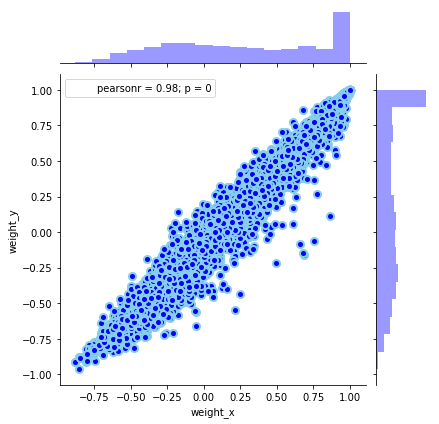

/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


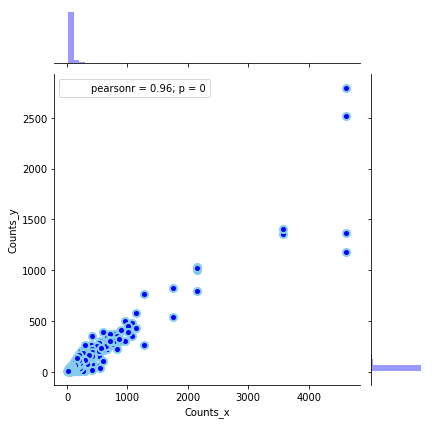

In [10]:
correlation_industry_pairs(sub_matrix_2009_2018_conn_less1,sub_matrix_2009_2018_less1)


correlation_industry_pairs(sub_matrix_2009_2018_conn_less1,sub_matrix_2009_2018_less1,'counts')


No handles with labels found to put in legend.


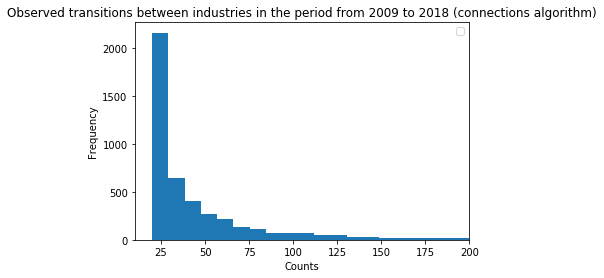

0.06047700170357751


In [11]:
sub_matrix_2009_2018_less1 = sub_matrix_2009_2018_conn_less1

plt.hist(sub_matrix_2009_2018_less1['Counts'],bins=500)

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Observed transitions between industries in the period from 2009 to 2018 (connections algorithm)')
plt.xlim(10, 200)
plt.legend()
plt.show()


sub_matrix_2009_2018_less1[sub_matrix_2009_2018_less1['Counts']<35].shape[0]/sub_matrix_2009_2018_less1.shape[0]

print (sub_matrix_2009_2018_less1[sub_matrix_2009_2018_less1['Counts']>200].shape[0]/sub_matrix_2009_2018_less1.shape[0])

In [12]:
Gm_simple_2009_2018_flows = build_network_object(reduced_matrix_2009_2018_flows,'weight')
Gm_simple_2009_2018_conn = build_network_object(reduced_matrix_2009_2018_conn,'weight')

## Degree comparison:

NETWORK OF flows


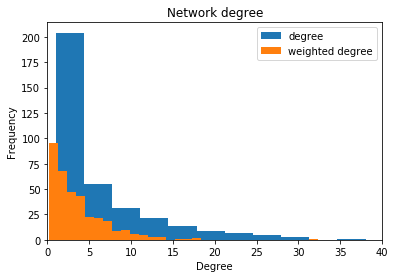

mean degree 6.921348314606742
mean strenght 3.8418144218080057


NETWORK OF connections


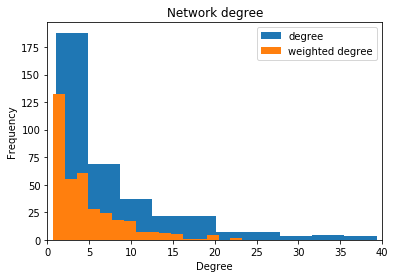

mean degree 8.168021680216802
mean strenght 4.775402312637026


In [13]:
print ('NETWORK OF flows')
compare_degrees_strength(Gm_simple_2009_2018_flows)
print()
print()
print ('NETWORK OF connections')
compare_degrees_strength(Gm_simple_2009_2018_conn)

## Adjacency matrix:
### Flows:

/anaconda3/envs/kflows/lib/python3.7/site-packages/matplotlib/colorbar.py:600: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


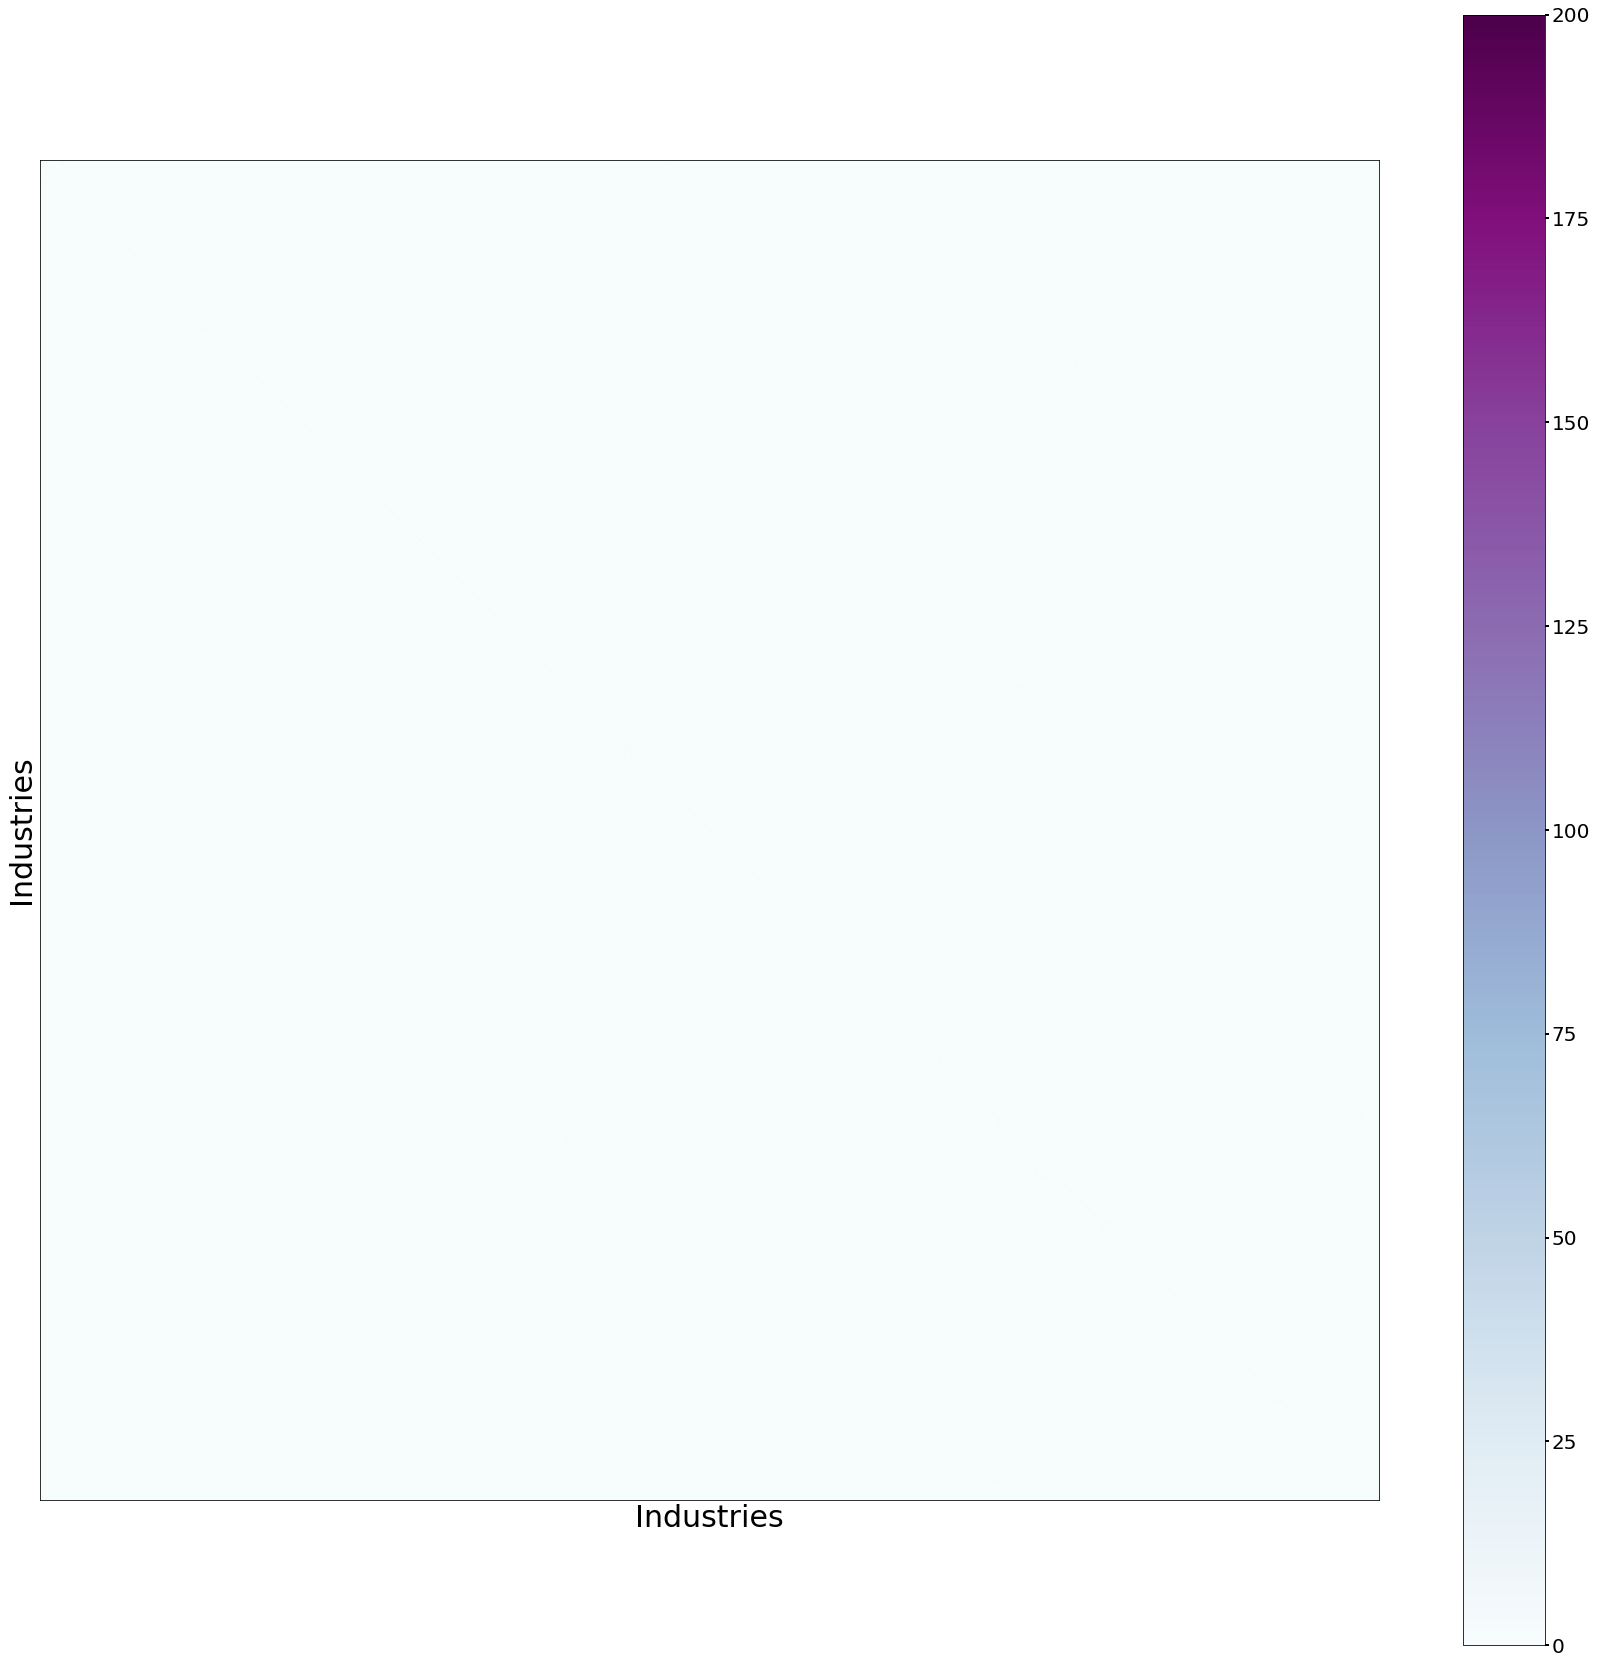

In [14]:
draw_adjacency_matrix_nolabel(reduced_matrix_2009_2018_flows[reduced_matrix_2009_2018_flows['weight']>0],['StartIndst','FinalIndst'],'weight')

### Connections:

/anaconda3/envs/kflows/lib/python3.7/site-packages/matplotlib/colorbar.py:600: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


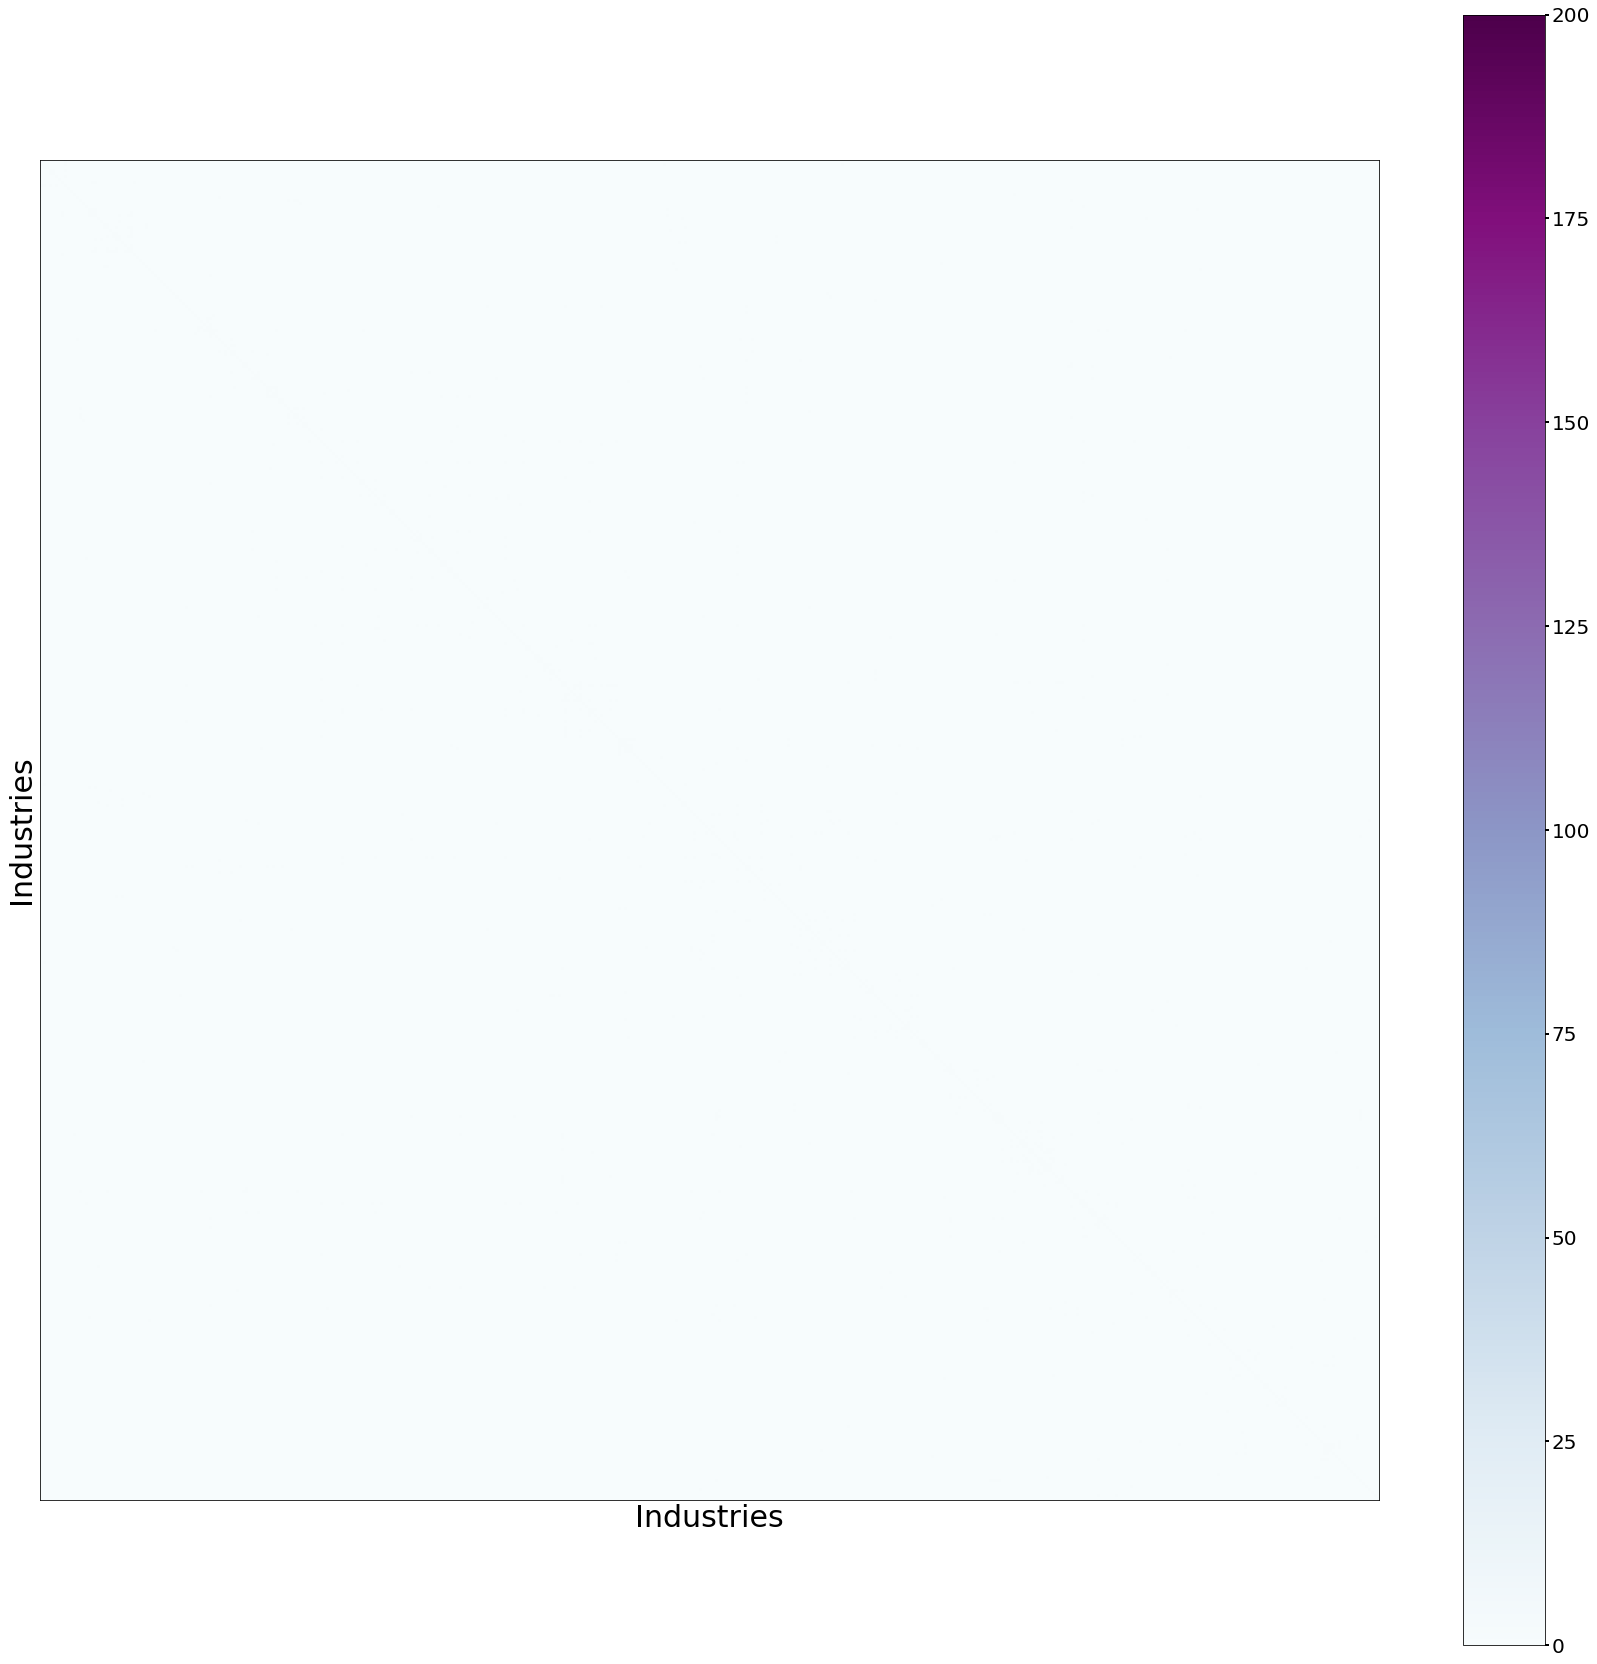

In [15]:
draw_adjacency_matrix_nolabel(reduced_matrix_2009_2018_conn[reduced_matrix_2009_2018_conn['weight']>0],['StartIndst','FinalIndst'],'weight')

In [16]:
reduced_matrix_2009_2018_conn

,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
1,8520,8520,1.000000,Primary,Primary,Education,Education,"Government administrative functions, Education...","Government administrative functions, Education...",1.0
2,8610,8520,-0.606580,Hospital activities,Primary,Human health activities,Education,"Government administrative functions, Education...","Government administrative functions, Education...",878.0
3,4711,8520,-0.358888,"Food, beverages, tobacco mainly",Primary,Non specialised retail stores,Education,"Wholesale and retail,motor vehicle repair,sale...","Government administrative functions, Education...",1146.0
4,6419,8520,-0.743929,Other monetary intermediation,Primary,"Financial, insurance, pension",Education,Business services,"Government administrative functions, Education...",167.0
5,5610,8520,-0.602132,"Restaurants, mobile food service",Primary,"Food, beverage service",Education,Other Service activities,"Government administrative functions, Education...",348.0
6,8424,8520,-0.468233,"Police, public order, safety activ.",Primary,Central/Local Gov. administration,Education,"Government administrative functions, Education...","Government administrative functions, Education...",187.0
7,7820,8520,-0.371101,Temporary employment agencies,Primary,Employment activities,Education,Business services,"Government administrative functions, Education...",1076.0
8,4771,8520,-0.431947,Clothing,Primary,Specialised retail - other,Education,"Wholesale and retail,motor vehicle repair,sale...","Government administrative functions, Education...",417.0
9,8411,8520,0.566564,General public administration,Primary,Central/Local Gov. administration,Education,"Government administrative functions, Education...","Government administrative functions, Education...",4619.0
10,8121,8520,-0.145681,General cleaning of buildings,Primary,"Buildings, landscape activities",Education,Business services,"Government administrative functions, Education...",839.0


/anaconda3/envs/kflows/lib/python3.7/site-packages/matplotlib/colorbar.py:600: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


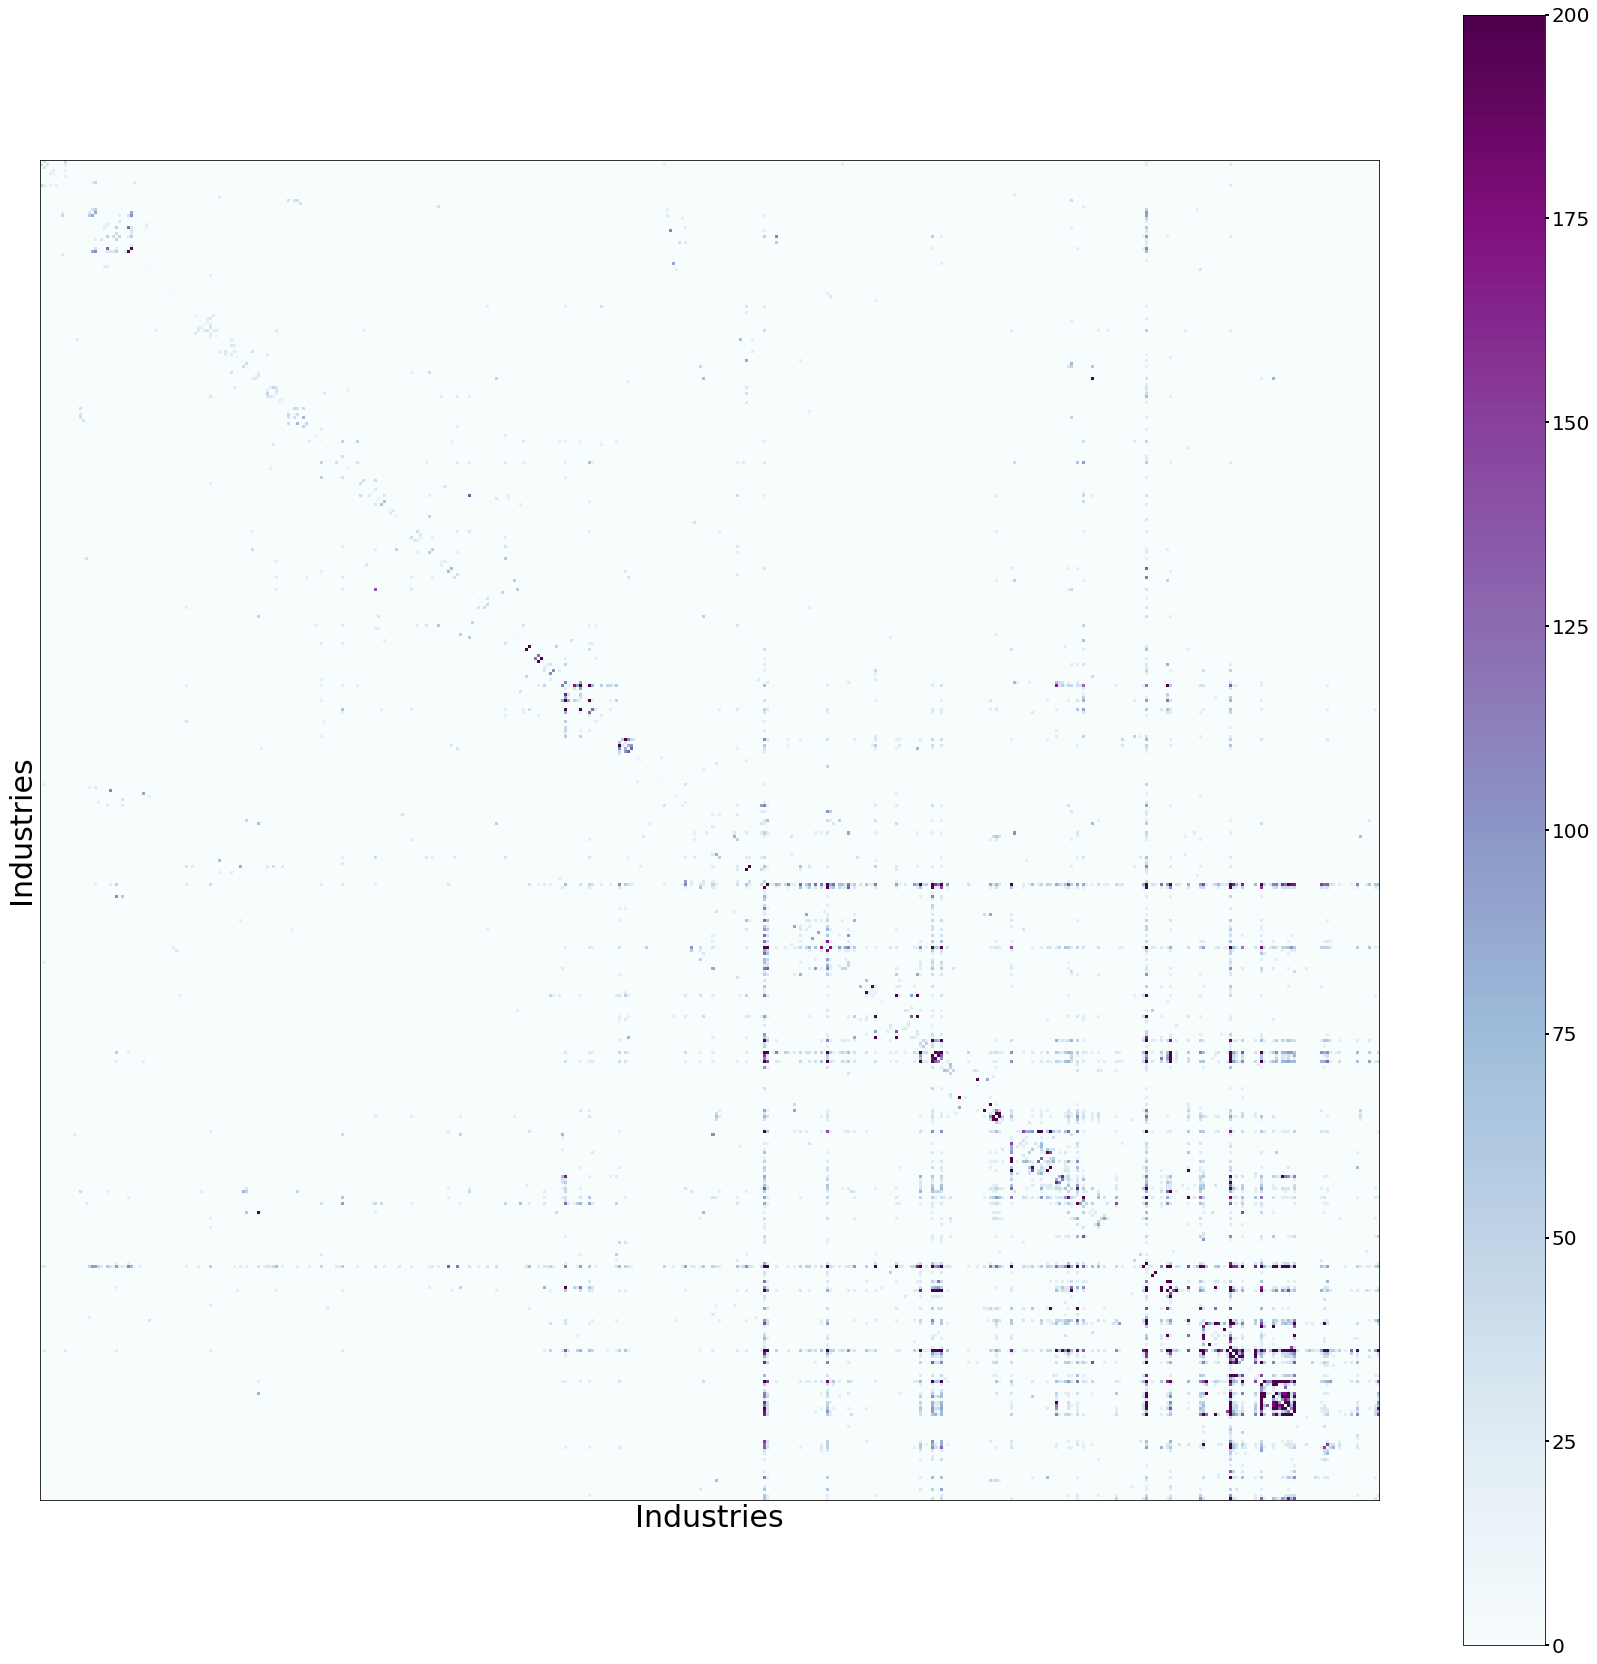

In [17]:

draw_adjacency_matrix_nolabel(reduced_matrix_2009_2018_conn,['StartIndst','FinalIndst'],'Counts')

/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


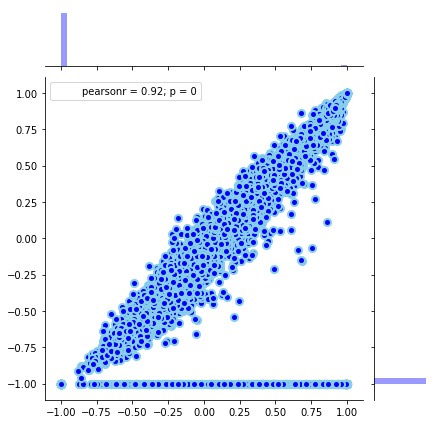

adjacency matrix correlation
(0.9229416828917629, 0.0)
percentage of the entries with non-symetrical missigness
0.4039893952783739
800
198025
5141
4341


In [18]:
corr_df, corr_df_names = correlation_adjacency_matrix(reduced_matrix_2009_2018_conn,reduced_matrix_2009_2018_flows,'weight')

# Edges existing in the connections matrix but missing on the flows matrix

In [19]:
values_with_entries = corr_df[((corr_df['x'] != -1) & (corr_df['y'] == -1)) | ((corr_df['y'] != -1) & (corr_df['x'] == -1))]


values_with_missigness = values_with_entries[(values_with_entries['y']==-1) & (values_with_entries['x']>0) & (values_with_entries['x']!=1)]['x']

np.unique(values_with_missigness).shape

(263,)

In [20]:
values_with_entries = corr_df_names[((corr_df_names['x'] != -1) & (corr_df_names['y'] == -1)) | ((corr_df_names['y'] != -1) & (corr_df_names['x'] == -1))]


values_with_missigness_counts = values_with_entries[(values_with_entries['y']==-1) & (values_with_entries['x']>0) & (values_with_entries['x']!=1)]

values_with_missigness_counts.sort_values(by='x',ascending=False)

,x,y,namex,namey
1339,0.999789,-1.0,"5071 Agriculture, Forestry, Fishing, Veteri...","5098 Agriculture, Forestry, Fishing, Veteri..."
1783,0.999789,-1.0,"5072 Agriculture, Forestry, Fishing, Veteri...","5072 Agriculture, Forestry, Fishing, Veteri..."
93931,0.999598,-1.0,"4919 Wholesale and retail,motor vehicle rep...","4919 Wholesale and retail,motor vehicle rep..."
16231,0.999598,-1.0,"4918 Manufacture food, drink, tobacco 5130 ...","5130 Manufacture food, drink, tobacco Name:..."
59763,0.999533,-1.0,"4959 Manufacture machinery, vehicle, transp...","5059 Manufacture machinery, vehicle, transp..."
59319,0.999533,-1.0,"4340 Manufacture machinery, vehicle, transp...","5030 Manufacture machinery, vehicle, transp..."
49995,0.999477,-1.0,"5057 Manufacture computer, electronic, ligh...","5025 Manufacture computer, electronic, ligh..."
69087,0.999477,-1.0,3704 Machinery repair excluding motor vehic...,5056 Machinery repair excluding motor vehic...
9380,0.999196,-1.0,"5003 Manufacture food, drink, tobacco 4298 ...","4658 Manufacture food, drink, tobacco Name:..."
15596,0.999196,-1.0,"5002 Manufacture food, drink, tobacco 4297 ...","5002 Manufacture food, drink, tobacco Name:..."


No handles with labels found to put in legend.


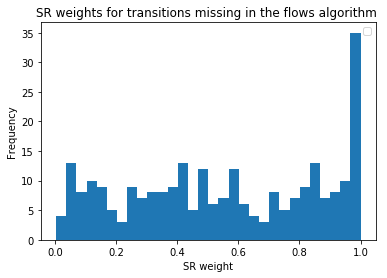

In [21]:
plt.hist(np.unique(values_with_missigness),bins=30)
plt.xlabel('SR weight')
plt.ylabel('Frequency')
plt.title('SR weights for transitions missing in the flows algorithm ')
plt.legend()
plt.show()



/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


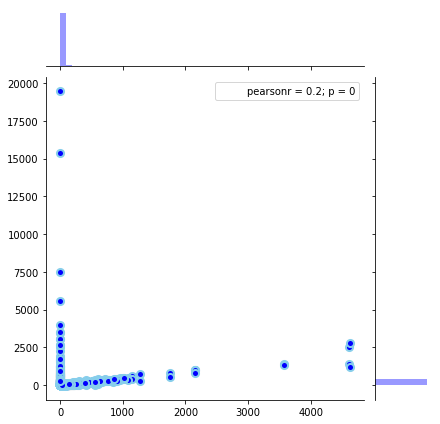

adjacency matrix correlation
(0.2029266956265835, 0.0)
percentage of the entries with non-symetrical missigness
0.4039893952783739
800
198025
5141
4341


In [22]:
corr_df_counts, corr_df_names = correlation_adjacency_matrix(reduced_matrix_2009_2018_conn,reduced_matrix_2009_2018_flows,'Counts')

In [23]:
counts_with_entries = corr_df_counts[((corr_df_counts['x'] != -1) & (corr_df_counts['y'] == -1)) | ((corr_df_counts['y'] != -1) & (corr_df_counts
                                                                                                                                   ['x'] == -1))]
print (counts_with_entries.shape)
values_with_missigness = counts_with_entries[counts_with_entries['y']==-1]['x']

print (values_with_missigness[values_with_missigness<15].sum()/values_with_missigness[values_with_missigness<10000].sum())


#np.unique(values_with_missigness).shape

(800, 2)
0.0019207263837960537
